# 6.4 Machine Learning Regression

### Contents:

#### 1. Importing libraries and data
#### 2. Data cleaning
#### 3. Data prep for regression analysis
#### 4. Regression analysis

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Define path
path = r'C:\Users\kaydo\OneDrive\Desktop\final'

In [4]:
# import housesales.csv

df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'housesales.csv'),index_col = False)

## 2. Data Cleaning

In [5]:
df.columns

Index(['id', 'Date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [6]:
df.head(20)

,id,Date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,2524049179,08/26/14,2000000,3,2.75,44867,1.0,0,4,3,720,1968,0,98040,47.5316,-122.233
1,7922800400,08/27/14,951000,5,3.25,14342,2.0,0,4,4,0,1968,0,98008,47.5880,-122.116
2,8096000060,04/13/15,655000,2,1.75,15798,2.0,1,4,3,220,1915,1978,98166,47.4497,-122.375
3,2025069065,09/29/14,2400000,4,2.50,8354,1.0,1,4,3,1820,2000,0,98074,47.6338,-122.072
4,2123039032,10/27/14,369900,1,0.75,10079,1.0,1,4,5,0,1936,0,98070,47.4683,-122.438
5,3225069065,06/24/14,3075000,4,5.00,18641,1.0,1,4,3,1950,2002,0,98074,47.6053,-122.077
6,1860600135,05/02/14,2384000,5,2.50,9050,2.0,0,4,5,280,1921,0,98119,47.6345,-122.367
7,1560930070,09/11/14,840000,4,3.50,40139,1.0,0,4,4,0,1986,0,98038,47.4010,-122.026
8,622049114,02/18/15,2125000,3,2.50,24069,2.0,1,4,4,0,1976,0,98166,47.4169,-122.348
9,2998800125,07/01/14,730000,2,2.25,4920,1.5,0,4,4,600,1941,0,98116,47.5730,-122.409


In [7]:
# Check for missing values

df.isnull().sum()

id               0
Date             0
price            0
bedrooms         0
bathrooms        0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
dtype: int64

In [8]:
dups = df.duplicated()

In [9]:
dups.shape

(21436,)

There are no missing or duplicated values.

C:\Users\kaydo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

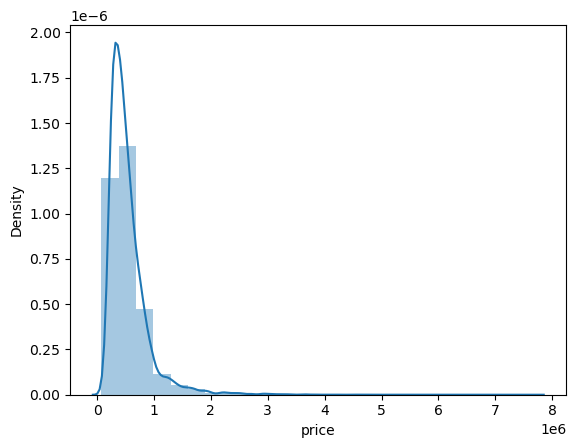

In [10]:
sns.distplot(df['price'], bins=25) # Shows extreme values

In [11]:
#check the mean

df['price'].mean()

540529.2871804441

In [12]:
#check the median

df['price'].median()

450000.0

In [13]:
#check the max

df['price'].max()

7700000

## 3. Data Prep for Regression Analysis

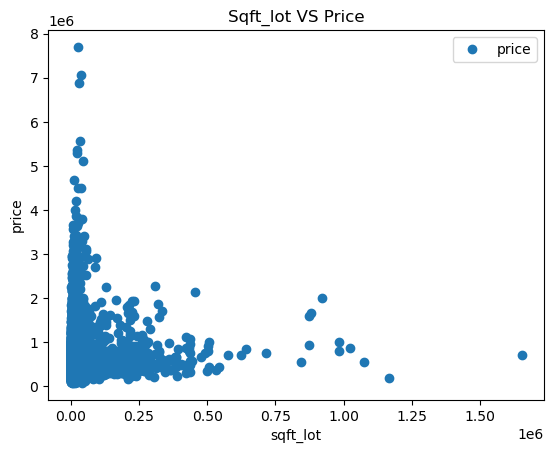

In [14]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'sqft_lot', y='price',style='o')
plt.title('Sqft_lot VS Price')  
plt.xlabel('sqft_lot')  
plt.ylabel('price')  
plt.show()

### Hypothesis: If there are more bathrooms within a house, the price of the house will go up.

In [15]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['sqft_lot'].values.reshape(-1,1)
y = df['price'].values.reshape(-1,1)

In [16]:
X

array([[44867],
       [14342],
       [15798],
       ...,
       [ 1350],
       [ 2388],
       [ 1076]], dtype=int64)

In [17]:
y

array([[2000000],
       [ 951000],
       [ 655000],
       ...,
       [ 402101],
       [ 400000],
       [ 325000]], dtype=int64)

In [18]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## 4. Regression Analysis

In [19]:
# Create a regression object.

regression = LinearRegression() 

In [20]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [21]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

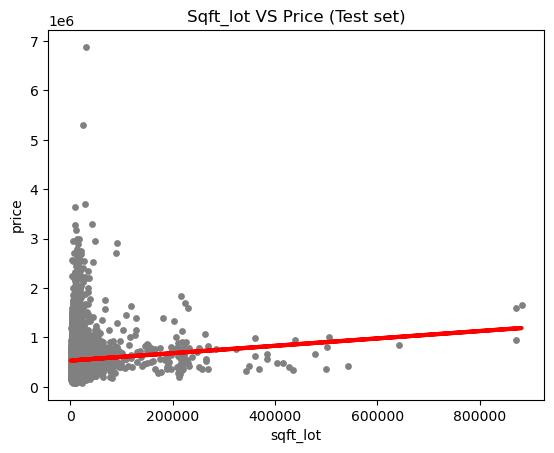

In [22]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Sqft_lot VS Price (Test set)')
plot_test.xlabel('sqft_lot')
plot_test.ylabel('price')
plot_test.show()

### Line Interpretation: There is a positive relationship between the sqft_lot and the price of the estate. 


In [23]:
# Create model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [24]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.74699207]]
Mean squared error:  125486653093.15892
R2 score:  0.009562289108826505


### Interpretation: Although there is a positive slope, the MSE remains high and the R2 score is considerably low.  

In [25]:
y_predicted

array([[598744.51824017],
       [543234.79082249],
       [536586.56143496],
       ...,
       [538222.47405953],
       [533335.65196366],
       [535466.07333593]])

In [26]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,495000,598744.518240
1,370000,543234.790822
2,802000,536586.561435
3,265000,537369.409120
4,899900,533007.722447
5,333000,535454.121463
6,212500,540844.416211
7,279000,535606.507844
8,499000,535690.170956
9,405000,536138.366195


### Interpretation: When comparing actuals to predicted values the predicted values are very off base and not close to the actuals on most accounts. I would say this model is not performing very accurately. After further analysis this would DISPROVE my hypothesis of, If there are more bathrooms, the price of the estate will go up. 

In [27]:
# Predict.

y_predicted_train = regression.predict(X_train)

In [28]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [29]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.74699207]]
Mean squared error:  137826316110.15213
R2 score:  0.007195253508847421


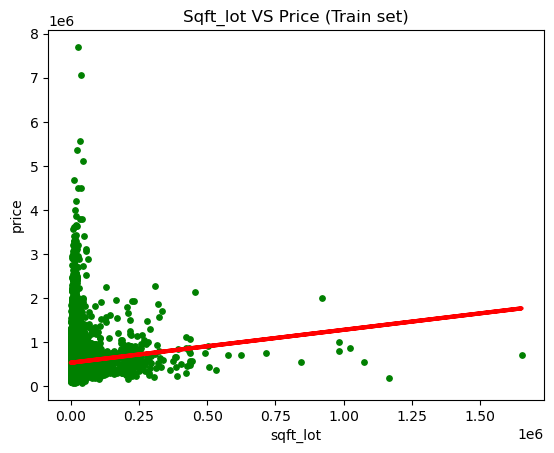

In [30]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Sqft_lot VS Price (Train set)')
plot_test.xlabel('sqft_lot')
plot_test.ylabel('price')
plot_test.show()